In [6]:
import numpy as np
import pandas as pd
from matplotlib.patches import Arc
import json
import pprint
import matplotlib.pyplot as plt
from pandas import json_normalize
import matplotlib.patches as pat

In [7]:
with open('../data/statsbomb360/events/3788747.json', 'r', encoding='utf-8') as file:
    matches=json.load(file)

matches = json_normalize(matches)

In [8]:
with open('../data/statsbomb360/events/3788747.json', encoding='utf-8') as file:
    events=json.load(file)

events = json_normalize(events)
#print(events[(events["type.name"]=="Pass")]) 

liste = ["location","player.name","pass.recipient.name","pass.end_location","pass.angle", "pass.outcome.name"]
passes_north_macedonia = events[(events["type.name"]=="Pass") & (events["team.name"]=="North Macedonia")][liste]

passes_north_macedonia.head()

,location,player.name,pass.recipient.name,pass.end_location,pass.angle,pass.outcome.name
37,"[7.0, 36.1]",Stole Dimitrievski,Eljif Elmas,"[63.3, 13.5]",-0.381731,Incomplete
41,"[47.7, 14.7]",Visar Musliu,Ezgjan Alioski,"[51.4, 5.9]",-1.172782,NaN
47,"[65.6, 0.1]",Ezgjan Alioski,Arijan Ademi,"[63.6, 8.5]",1.804540,NaN
51,"[62.6, 6.6]",Arijan Ademi,Ezgjan Alioski,"[67.5, 4.5]",-0.404892,NaN
53,"[68.9, 4.3]",Ezgjan Alioski,Arijan Ademi,"[66.2, 5.9]",2.606638,Incomplete


In [9]:

dist = passes_north_macedonia.apply(lambda row: list(np.subtract(list(row["pass.end_location"]),[x for x in row.location])),axis = 1)
norm = np.zeros(len(dist))
for i,element in enumerate(list(dist)):
    norm[i] = np.linalg.norm(element)
passes_north_macedonia["dist"] = norm
passes_north_macedonia.head()

,location,player.name,pass.recipient.name,pass.end_location,pass.angle,pass.outcome.name,dist
37,"[7.0, 36.1]",Stole Dimitrievski,Eljif Elmas,"[63.3, 13.5]",-0.381731,Incomplete,60.666712
41,"[47.7, 14.7]",Visar Musliu,Ezgjan Alioski,"[51.4, 5.9]",-1.172782,NaN,9.546203
47,"[65.6, 0.1]",Ezgjan Alioski,Arijan Ademi,"[63.6, 8.5]",1.804540,NaN,8.634813
51,"[62.6, 6.6]",Arijan Ademi,Ezgjan Alioski,"[67.5, 4.5]",-0.404892,NaN,5.331041
53,"[68.9, 4.3]",Ezgjan Alioski,Arijan Ademi,"[66.2, 5.9]",2.606638,Incomplete,3.138471


              player.name  loc_x  loc_y
0   Aleksandar Trajkovski  76.80  19.80
1            Arijan Ademi  52.35  43.40
2           Boban Nikolov  60.60  74.55
3         Darko Velkovski  38.60  50.55
4          Egzon Bejtulai  48.00  65.00
5             Eljif Elmas  66.40  21.40
6             Enis Bardhi  65.80  31.60
7          Ezgjan Alioski  64.80   6.30
8            Goran Pandev  67.65  40.00
9        Stefan Ristovski  42.30  68.10
10     Stole Dimitrievski  10.80  43.10
11     Tihomir Kostadinov  61.60  54.70
12           Visar Musliu  45.80  16.20
13


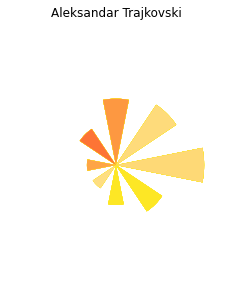

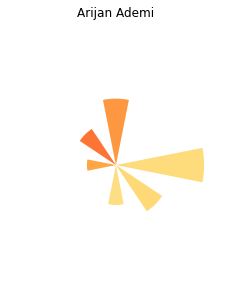

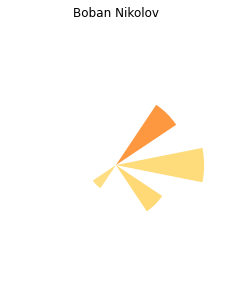

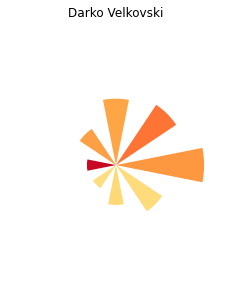

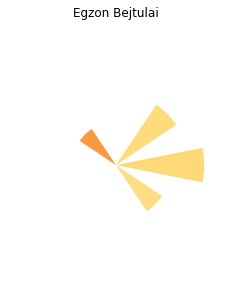

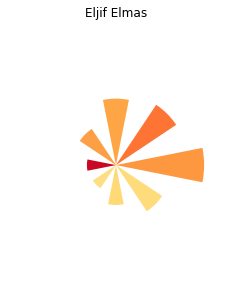

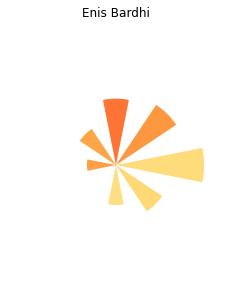

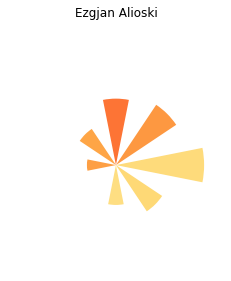

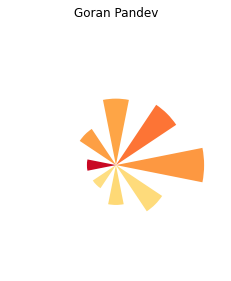

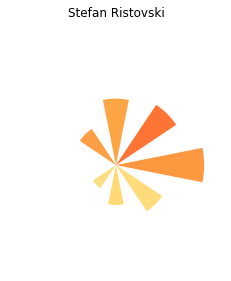

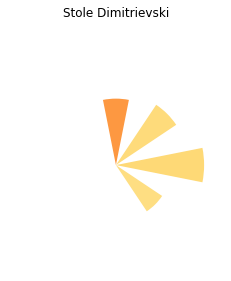

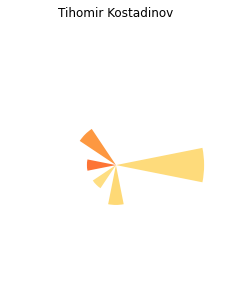

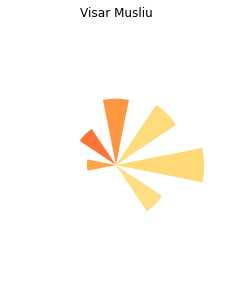

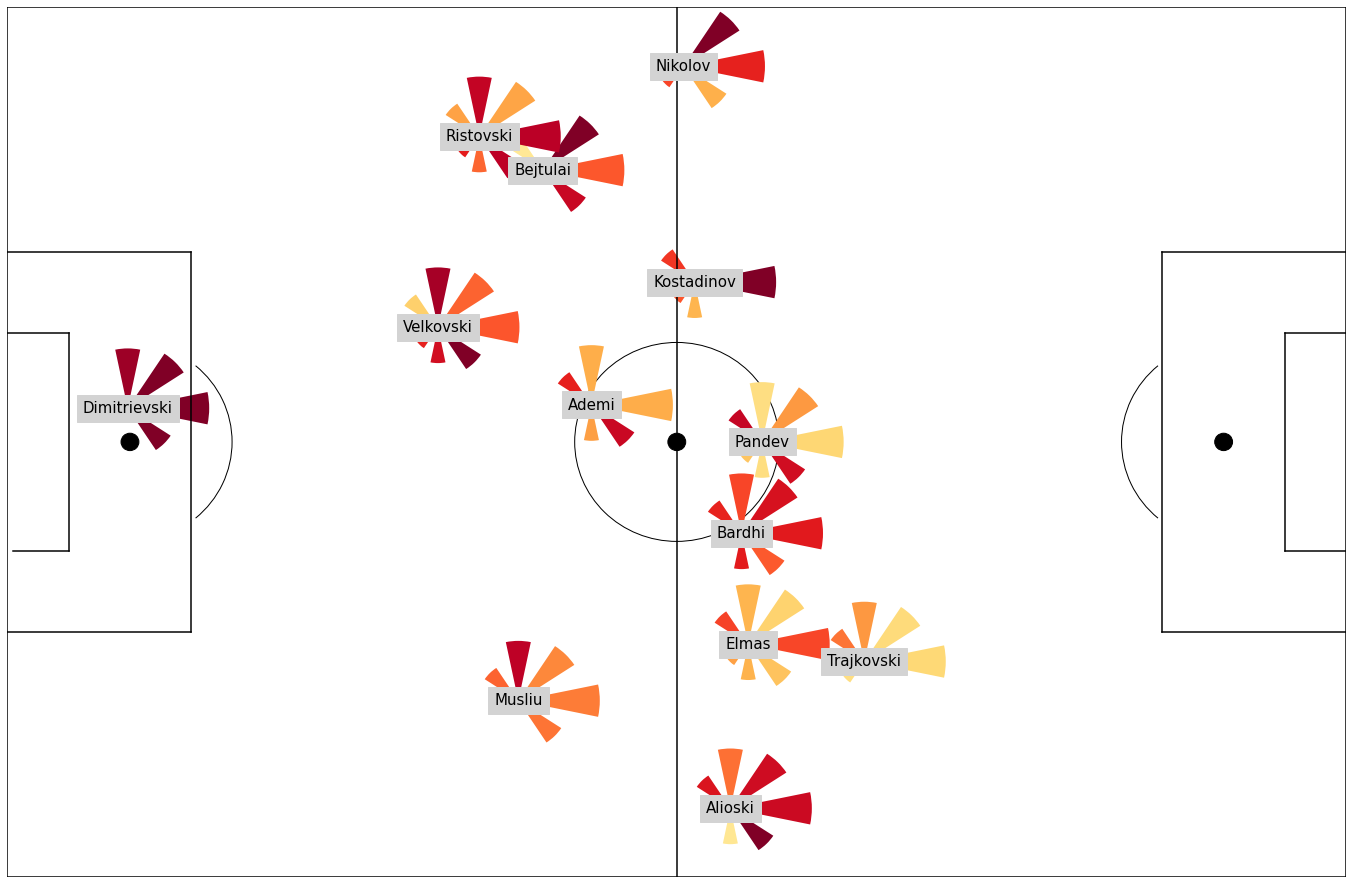

In [10]:
divisor = 8
degree = np.pi*2/divisor
passes_north_macedonia["angle_cat"] = ((passes_north_macedonia["pass.angle"] // (np.pi*2/divisor)) + 1)/(divisor/2)*np.pi

passes_north_macedonia["count"] = passes_north_macedonia.groupby('angle_cat')['angle_cat'].transform('count')

passes_north_macedonia[['loc_x','loc_y']] = pd.DataFrame(passes_north_macedonia.location.tolist(), index= passes_north_macedonia.index)
player_pos = passes_north_macedonia.groupby(["player.name"],as_index=False)
player_pos = player_pos.agg({"loc_x": "median", "loc_y": "median"})
print(player_pos)

team = False
if team:
    pass_sonar = passes_north_macedonia.groupby(["angle_cat"], as_index=False)
else:
    pass_sonar = passes_north_macedonia.groupby(["player.name", "angle_cat"], as_index=False)

pass_sonar = pass_sonar.agg({"dist": "mean", "count": "median"})

pass_sonar.head()


ax = plt.subplot(111, projection='polar')

my_cmap = plt.cm.get_cmap('viridis')
colors = my_cmap(pass_sonar["dist"])
bars = ax.bar(pass_sonar["angle_cat"], pass_sonar["count"],width=np.pi/divisor, color=colors)





players = pass_sonar["player.name"].unique()
print(len(players))

for player in players:
    player_sonar = pass_sonar[pass_sonar["player.name"]==player].copy()
    ax = plt.subplot(111, projection="polar")
    my_cmap = plt.cm.get_cmap('YlOrRd')
    colors = my_cmap(pass_sonar["dist"]/30)
    bars = ax.bar(list(player_sonar["angle_cat"]), list(player_sonar["count"]), width=np.pi/divisor, color=colors)
    ax.set_ylim(0,90)
    plt.axis("off")
    plt.title(player + "\n")
    plt.show()




fig,ax = plt.subplots()
fig.set_size_inches(24, 16)
plt.xlim(0,120)
plt.ylim(0,80)
plt.axis("off")

#Pitch Outline & Centre Line
plt.plot([0,0],[0,80], color="black")
plt.plot([0,120],[80,80], color="black")
plt.plot([120,120],[80,0], color="black")
plt.plot([120,0],[0,0], color="black")
plt.plot([60,60],[0,80], color="black")

#Left Penalty Area
plt.plot([16.5,16.5],[57.5,22.5],color="black")
plt.plot([0,16.5],[57.5,57.5],color="black")
plt.plot([16.5,0],[22.5,22.5],color="black")

#Right Penalty Area
plt.plot([120,103.5],[57.5, 57.5],color="black")
plt.plot([103.5,103.5],[57.5,22.5],color="black")
plt.plot([103.5,120],[22.5,22.5],color="black")

#Left 6-yard Box
plt.plot([0,5.5],[50,50],color="black")
plt.plot([5.5,5.5],[50,30],color="black")
plt.plot([5.5,0.5],[30,30],color="black")

#Right 6-yard Box
plt.plot([120,114.5],[50,50],color="black")
plt.plot([114.5,114.5],[50,30],color="black")
plt.plot([114.5,120],[30,30],color="black")

#Prepare Circles
centreCircle = plt.Circle((60,40),9.15,color="black",fill=False)
centreSpot = plt.Circle((60,40),0.8,color="black")
leftPenSpot = plt.Circle((11,40),0.8,color="black")
rightPenSpot = plt.Circle((109,40),0.8,color="black")

#Draw Circles
ax.add_patch(centreCircle)
ax.add_patch(centreSpot)
ax.add_patch(leftPenSpot)
ax.add_patch(rightPenSpot)

#Prepare Arcs
leftArc = Arc((11,40),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="black")
rightArc = Arc((109,40),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")

#Draw Arcs
ax.add_patch(leftArc)
ax.add_patch(rightArc)


for _, player in player_pos.iterrows():
    ax.text(player.loc_x, player.loc_y, player["player.name"].split()[-1], ha="center", va="center", color="black", backgroundcolor="lightgray", size=15)
    
    player_sonar = pass_sonar[pass_sonar["player.name"]==player["player.name"]]
    
    for _,row in player_sonar.iterrows():
        my_cmap = plt.cm.get_cmap('YlOrRd')
        colors = my_cmap(row["dist"]/30)
        pass_wedge = pat.Wedge(
          center=(player.loc_x, player.loc_y)
          ,r=int(row["count"])*0.1
          ,theta1=row["angle_cat"]/np.pi*180 - 11.75
          ,theta2=row["angle_cat"]/np.pi*180 + 11.75
          ,facecolor=colors
        )
        ax.add_patch(pass_wedge)

plt.savefig("../upload/Passing_sonars_north_macedonia.png")